In [1]:
#Nicole Lubaczewska
#October 13
#ICA 07

In [2]:
path = '/Users/nicolelubaczewska/Downloads/CarInsurance.csv'

import pandas as pd

carins = pd.read_csv(path)

carins

,Customer_ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,M,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,M,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,M,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,M,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,M,27,1,28,1,< 1 Year,No,59097,152,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,F,26,1,37,1,< 1 Year,No,30867,152,56
127033,508143,F,38,1,28,0,1-2 Year,Yes,28700,122,165
127034,508144,M,21,1,46,1,< 1 Year,No,29802,152,74
127035,508145,M,71,1,28,1,1-2 Year,No,62875,26,265


In [10]:
#1.d

#2.a

carins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Customer_ID           127037 non-null  int64 
 1   Gender                127037 non-null  object
 2   Age                   127037 non-null  int64 
 3   Driving_License       127037 non-null  int64 
 4   Region_Code           127037 non-null  int64 
 5   Previously_Insured    127037 non-null  int64 
 6   Vehicle_Age           127037 non-null  object
 7   Vehicle_Damage        127037 non-null  object
 8   Annual_Premium        127037 non-null  int64 
 9   Policy_Sales_Channel  127037 non-null  int64 
 10  Vintage               127037 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.7+ MB


In [13]:
#3.a

carins.isna().sum()
carins.duplicated().sum()

0

In [38]:
#4.c

carins[carins.Gender == 'M'] #68236
carins[carins.Gender == 'F'] # 58801

carins.Gender.value_counts(normalize = True)

M    0.537135
F    0.462865
Name: Gender, dtype: float64

(array([42812., 14630., 12429., 16136., 15524.,  8818.,  7472.,  4875.,
         3677.,   664.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

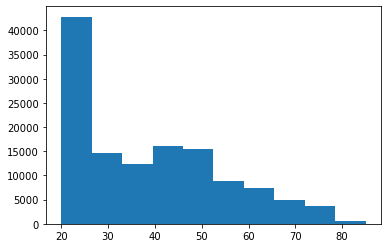

In [6]:
#5.b

import matplotlib.pyplot as plt

plt.hist(carins.Age) 

(array([   0.,    0., 2223., 2181., 2187., 2205., 2143., 2225., 2219.,
        2210., 2104., 2255., 2252., 2114., 2210., 2097., 2242., 2228.,
        2216., 2111., 2241., 2156., 2201., 2257., 2136., 2214., 2224.,
        2195., 2288., 2222., 2250., 2083., 2167., 2178., 2154., 2182.,
        2161., 2196., 2221., 2171., 2209., 2170., 2168., 2154., 2238.,
        2198., 2245., 2223., 2197., 2156., 2117., 2201., 2249., 2160.,
        2266., 2102., 2080., 2251., 2673.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295]),
 <BarContainer object of 59 artists>)

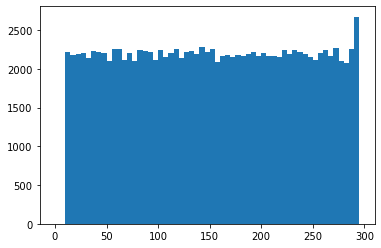

In [54]:
#6.a

plt.hist(carins.Vintage, bins = range(0,300,5))

In [63]:
#7.c

len(carins['Region_Code'].unique())

53

In [4]:
#8.b

carins[['Annual_Premium','Vehicle_Damage']].groupby('Vehicle_Damage').agg('median')

32476.0-30940.0

1536.0

In [79]:
#9.a

carins[['Annual_Premium','Vehicle_Age']].groupby('Vehicle_Age').agg('mean')


,Annual_Premium
Vehicle_Age,
1-2 Year,30489.908844
< 1 Year,30084.525709
> 2 Years,35512.727204


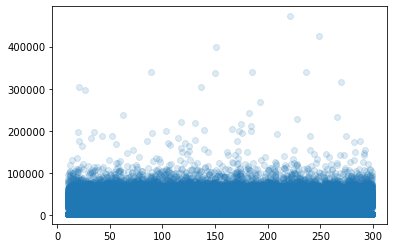

,Annual_Premium,Vintage
Annual_Premium,1.000000,-0.001607
Vintage,-0.001607,1.000000


In [7]:
#10.d

plt.scatter(carins['Vintage'], carins['Annual_Premium'], alpha = 0.15)
plt.show()

carins[['Annual_Premium', 'Vintage']].corr()

In [90]:
#11.d

carins[['Gender','Annual_Premium']].groupby('Gender').agg('mean')


,Annual_Premium
Gender,
F,30470.470485
M,30571.326147


In [121]:
#12.a

FilteredCarins = (carins.Gender == 'F') & (carins.Age == 36) & (carins.Previously_Insured == 1) & (carins.Vehicle_Damage == 'No') & (carins.Vehicle_Age == '< 1 Year')

carins.Annual_Premium[FilteredCarins].mean()


2630.0

In [156]:
#13.b

carins.Age.median() #approx. 36 years old

carins.Gender.value_counts() #more Males

carins.Previously_Insured.value_counts() #not insured more

carins.Vehicle_Damage.value_counts() #more damages by little

carins.Annual_Premium.mean() #30525

carins.Vehicle_Age.value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

In [174]:
#14.c

NoDL = carins[(carins.Driving_License == 0)]

NoDL['Age'].median() #69 median
NoDL['Region_Code'].value_counts().nlargest(1) #28
NoDL['Gender'].value_counts() #male
NoDL['Previously_Insured'].value_counts() #not
NoDL['Vehicle_Damage'].value_counts() #yes


Yes    155
No      82
Name: Vehicle_Damage, dtype: int64

In [146]:
#15.b

6.0+3.0

9.0

In [175]:
#16. a,e

def addTwo(x): 
    """Adds two""" 
    x = x + 2 
    return(x)


In [9]:
#17.b

element = 'water'

if (element == 'water'):
    print('agua')
elif element == 'fire':
    print('fuego')
elif element == 'earth':
    print('tierra')
else:
    print('error')

agua
